<a href="https://colab.research.google.com/github/anas1IA/Analysis-of-Bank-Debit-Collections/blob/main/first_project_change).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# separate dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



## the transformation of data from a text file to a CSV


In [14]:
data_1year=pd.read_csv('csv_result-1year.csv')
data_2year=pd.read_csv('csv_result-2year .csv')
data_3year=pd.read_csv('csv_result-3year.csv')
data_4year=pd.read_csv('csv_result-4year.csv')
data_5year=pd.read_csv('csv_result-5year.csv')
all_data = pd.concat([data_1year, data_2year, data_3year, data_4year, data_5year], ignore_index=True)
all_data

<ipython-input-14-9e51fdb42de8>:2: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2year=pd.read_csv('csv_result-2year .csv')
<ipython-input-14-9e51fdb42de8>:3: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_3year=pd.read_csv('csv_result-3year.csv')
<ipython-input-14-9e51fdb42de8>:4: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_4year=pd.read_csv('csv_result-4year.csv')


id     Attr1    Attr2      Attr3    Attr4    Attr5     Attr6  \
0         1   0.20055  0.37951    0.39641   2.0472   32.351   0.38825   
1         2   0.20912  0.49988    0.47225   1.9447   14.786         0   
2         3   0.24866  0.69592    0.26713   1.5548  -1.1523         0   
3         4  0.081483  0.30734    0.45879   2.4928   51.952   0.14988   
4         5   0.18732  0.61323     0.2296   1.4063  -7.3128   0.18732   
...     ...       ...      ...        ...      ...      ...       ...   
43400  5906  0.012898  0.70621   0.038857   1.1722  -18.907         0   
43401  5907  -0.57805  0.96702   -0.80085  0.16576  -67.365  -0.57805   
43402  5908  -0.17905   1.2553   -0.27599  0.74554  -120.44  -0.17905   
43403  5909  -0.10886  0.74394   0.015449   1.0878  -17.003  -0.10886   
43404  5910  -0.10537  0.53629  -0.045578  0.91478  -56.068  -0.10537   

          Attr7     Attr8    Attr9  ...    Attr56    Attr57   Attr58  \
0       0.24976    1.3305   1.1389  ...   0.12196   0.39718  0.87804   
1       0.25834   0.99601   1.6996  ...    0.1213   0.42002    0.853   
2       0.30906   0.43695    1.309  ...   0.24114   0.81774  0.76599   
3      0.092704    1.8661   1.0571  ...  0.054015   0.14207  0.94598   
4       0.18732    0.6307   1.1559  ...   0.13485   0.48431  0.86515   
...         ...       ...      ...  ...       ...       ...      ...   
43400  0.013981     0.416   1.6768  ...  0.020169  0.043904   1.0122   
43401  -0.57805  -0.40334  0.93979  ... -0.064073     1.482   1.0641   
43402  -0.15493  -0.26018   1.1749  ...   0.14888   0.54824  0.85112   
43403  -0.10918   0.12531  0.84516  ...   -0.1832   -1.1677   1.1832   
43404  -0.10994    0.8646   0.9504  ... -0.052186  -0.22725   1.0522   

          Attr59  Attr60  Attr61  Attr62  Attr63   Attr64 class  
0       0.001924   8.416  5.1372  82.658  4.4158   7.4277     0  
1              0  4.1486  3.2732  107.35     3.4   60.987     0  
2        0.69484  4.9909   3.951  134.27  2.7185   5.2078     0  
3              0  4.5746  3.6147  86.435  4.2228   5.5497     0  
4        0.12444  6.3985  4.3158  127.21  2.8692    7.898     0  
...          ...     ...     ...     ...     ...      ...   ...  
43400     1.2594  13.472  12.432  49.117  7.4313   2.2799     1  
43401  -0.018084  110.72  44.759   81.22   4.494   5.1305     1  
43402   -0.52243  9.8526  3.4892  207.87  1.7559   9.9527     1  
43403     6.0924  13.886  6.0769  83.122  4.3911  0.95575     1  
43404   0.003196  7.7332  4.7174  136.85  2.6672   2.7927     1  

[43405 rows x 66 columns]

In [15]:
formulas = ["id",
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]


In [16]:
all_data.columns=formulas
all_data

id net profit / total assets total liabilities / total assets  \
0         1                   0.20055                          0.37951   
1         2                   0.20912                          0.49988   
2         3                   0.24866                          0.69592   
3         4                  0.081483                          0.30734   
4         5                   0.18732                          0.61323   
...     ...                       ...                              ...   
43400  5906                  0.012898                          0.70621   
43401  5907                  -0.57805                          0.96702   
43402  5908                  -0.17905                           1.2553   
43403  5909                  -0.10886                          0.74394   
43404  5910                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   


## Data Cleaning


###Handling Missing Values


In [17]:
all_data_rest = all_data.astype(str)
all_data.replace("?", float('nan'), inplace=True)


In [18]:
all_data_rest

id net profit / total assets total liabilities / total assets  \
0         1                   0.20055                          0.37951   
1         2                   0.20912                          0.49988   
2         3                   0.24866                          0.69592   
3         4                  0.081483                          0.30734   
4         5                   0.18732                          0.61323   
...     ...                       ...                              ...   
43400  5906                  0.012898                          0.70621   
43401  5907                  -0.57805                          0.96702   
43402  5908                  -0.17905                           1.2553   
43403  5909                  -0.10886                          0.74394   
43404  5910                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   


In [19]:
all_data_reset = all_data.drop("id", axis=1)
all_data_reset

net profit / total assets total liabilities / total assets  \
0                       0.20055                          0.37951   
1                       0.20912                          0.49988   
2                       0.24866                          0.69592   
3                      0.081483                          0.30734   
4                       0.18732                          0.61323   
...                         ...                              ...   
43400                  0.012898                          0.70621   
43401                  -0.57805                          0.96702   
43402                  -0.17905                           1.2553   
43403                  -0.10886                          0.74394   
43404                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   
43404                         -0.10537            -0.10994   

      

In [20]:
missing_values_count=all_data_reset.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:]

net profit / total assets                                                                                              8
total liabilities / total assets                                                                                       8
working capital / total assets                                                                                         8
current assets / short-term liabilities                                                                              134
(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365     89
                                                                                                                    ... 
sales / receivables                                                                                                  102
(short-term liabilities * 365) / sales                                                                               127
sales / short-term liabilities  

In [21]:
total_cells = np.product(all_data_reset.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.4646309801245867


<Axes: >

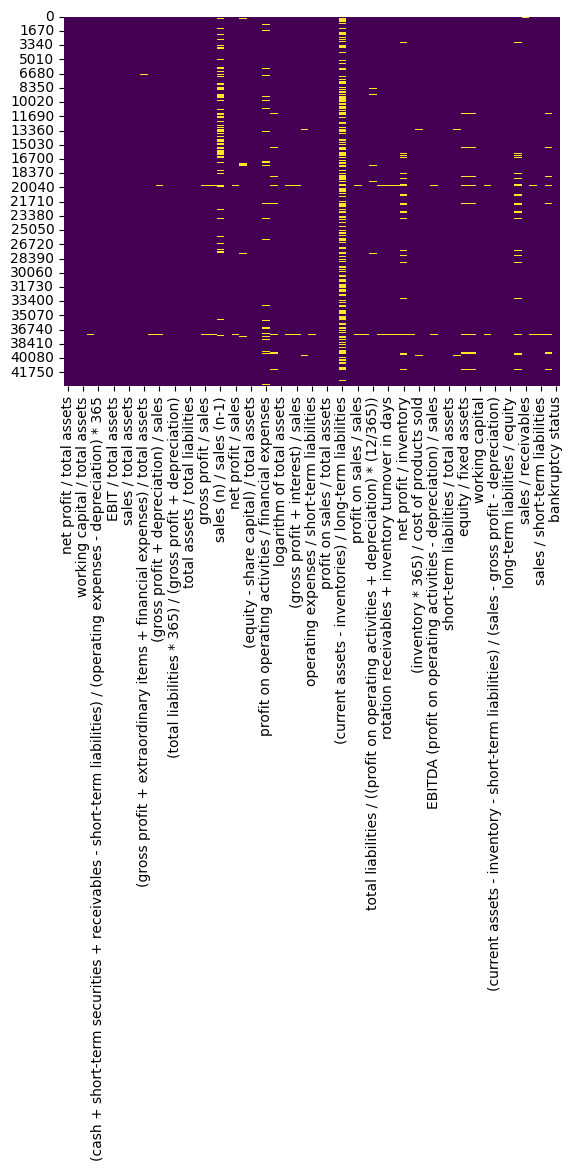

In [22]:
sns.heatmap(all_data_reset.isnull(),cbar=False,cmap='viridis')

In [23]:
all_data_reset

net profit / total assets total liabilities / total assets  \
0                       0.20055                          0.37951   
1                       0.20912                          0.49988   
2                       0.24866                          0.69592   
3                      0.081483                          0.30734   
4                       0.18732                          0.61323   
...                         ...                              ...   
43400                  0.012898                          0.70621   
43401                  -0.57805                          0.96702   
43402                  -0.17905                           1.2553   
43403                  -0.10886                          0.74394   
43404                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   
43404                         -0.10537            -0.10994   

      

##Handling duplicate data


In [24]:
#check if data has duplicates values
duplicates = all_data_reset.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
43400    False
43401    False
43402    False
43403    False
43404    False
Length: 43405, dtype: bool


#####We note that duplicates do not exist


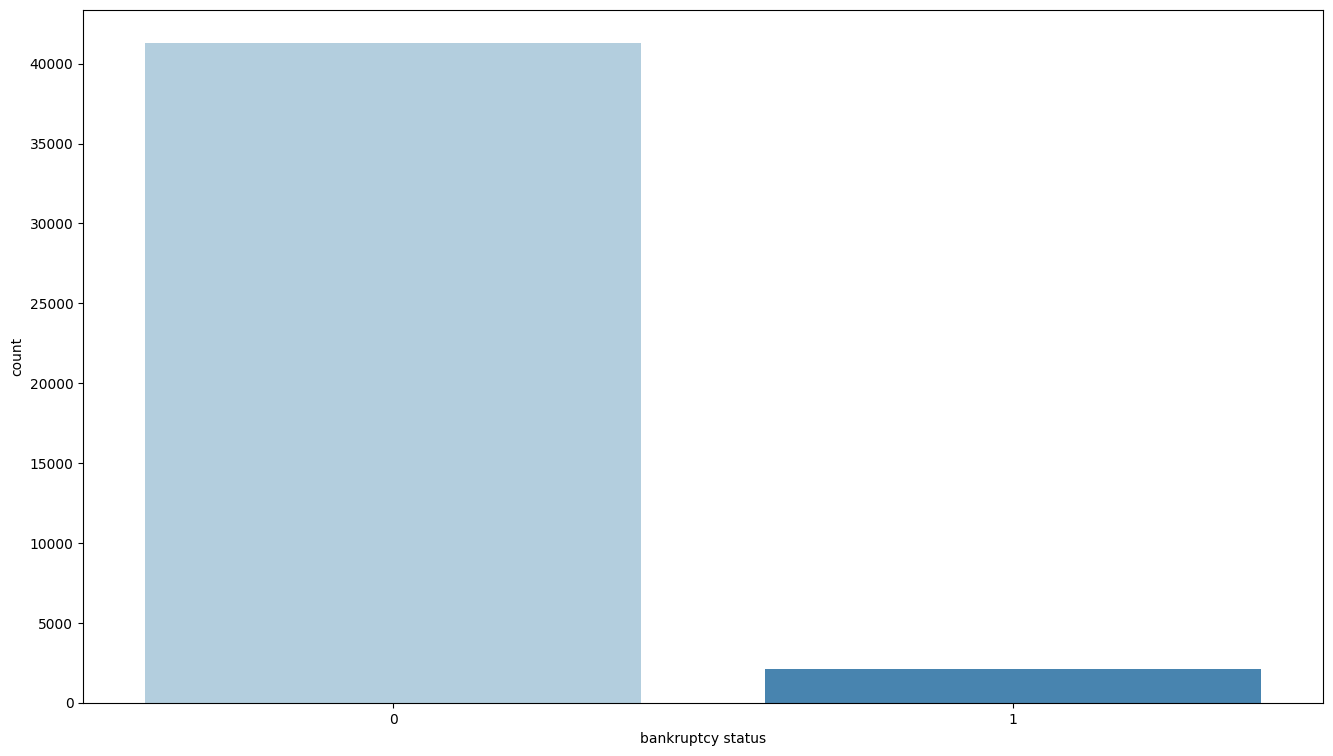

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.countplot(x ='bankruptcy status',data = all_data_reset,palette ='Blues' )
plt.show()

In [26]:
display(all_data_reset.describe().round(2))

bankruptcy status
count           43405.00
mean                0.05
std                 0.21
min                 0.00
25%                 0.00
50%                 0.00
75%                 0.00
max                 1.00

In [27]:
all_data_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   net profit / total assets                                                                                          43397 non-null  object
 1   total liabilities / total assets                                                                                   43397 non-null  object
 2   working capital / total assets                                                                                     43397 non-null  object
 3   current assets / short-term liabilities                                                                            43271 non-null  object
 4   (cash + short-term securitie

In [28]:
all_data_reset.shape

(43405, 65)

#Scaling and  Normalization


In [29]:
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
data_scaled = scaler.fit_transform(all_data_reset)
# data_scaled is now a numpy array with scaled values

# Convert the numpy array back to a DataFrame with the original columns
data_scaled = pd.DataFrame(data_scaled, columns=all_data_reset.columns)
data_scaled.head()

net profit / total assets  total liabilities / total assets  \
0                   0.831450                          0.472949   
1                   0.831466                          0.473081   
2                   0.831536                          0.473296   
3                   0.831237                          0.472870   
4                   0.831426                          0.473206   

   working capital / total assets  current assets / short-term liabilities  \
0                        0.945033                                 0.000046   
1                        0.945182                                 0.000044   
2                        0.944778                                 0.000037   
3                        0.945156                                 0.000054   
4                        0.944705                                 0.000034   

   (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                           0.904960                                                                   
1                                           0.904959                                                                   
2                                           0.904958                                                                   
3                                           0.904962                                                                   
4                                           0.904957                                                                   

   retained earnings / total assets  EBIT / total assets  \
0                          0.483805             0.443752   
1                          0.483436             0.443759   
2                          0.483436             0.443803   
3                          0.483578             0.443617   
4                          0.483614             0.443698   

   book value of equity / total liabilities  sales / total assets  \
0                                  0.002664              0.000476   
1                                  0.002658              0.000533   
2                                  0.002648              0.000493   
3                                  0.002674              0.000467   
4                                  0.002651              0.000477   

   equity / total assets  ...  (sales - cost of products sold) / sales  \
0               0.304174  ...                                 0.999736   
1               0.304169  ...                                 0.999736   
2               0.304046  ...                                 0.999736   
3               0.304217  ...                                 0.999736   
4               0.304099  ...                                 0.999736   

   (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  \
0                                           0.751235                                               
1                                           0.751246                                               
2                                           0.751425                                               
3                                           0.751120                                               
4                                           0.751274                                               

   total costs / total sales  long-term liabilities / equity  \
0                    0.00018                        0.013563   
1                    0.00018                        0.013563   
2                    0.00018                        0.013592   
3                    0.00018                        0.013563   
4                    0.00018                        0.013568   

   sales / inventory  sales / receivables  \
0           0.000004             0.000165   
1           0.000003             0.000147   
2           0.000004             0.000154   
3           0.000004         

In [30]:
formula= [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]

In [31]:
for col in formula:
    all_data_reset[col]=pd.to_numeric(all_data_reset[col])
    all_data_reset[col].fillna(all_data_reset[col].mean(), inplace=True)
all_data_reset.head()

net profit / total assets  total liabilities / total assets  \
0                   0.200550                           0.37951   
1                   0.209120                           0.49988   
2                   0.248660                           0.69592   
3                   0.081483                           0.30734   
4                   0.187320                           0.61323   

   working capital / total assets  current assets / short-term liabilities  \
0                         0.39641                                   2.0472   
1                         0.47225                                   1.9447   
2                         0.26713                                   1.5548   
3                         0.45879                                   2.4928   
4                         0.22960                                   1.4063   

   (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                            32.3510                                                                   
1                                            14.7860                                                                   
2                                            -1.1523                                                                   
3                                            51.9520                                                                   
4                                            -7.3128                                                                   

   retained earnings / total assets  EBIT / total assets  \
0                           0.38825             0.249760   
1                           0.00000             0.258340   
2                           0.00000             0.309060   
3                           0.14988             0.092704   
4                           0.18732             0.187320   

   book value of equity / total liabilities  sales / total assets  \
0                                   1.33050                1.1389   
1                                   0.99601                1.6996   
2                                   0.43695                1.3090   
3                                   1.86610                1.0571   
4                                   0.63070                1.1559   

   equity / total assets  ...  (sales - cost of products sold) / sales  \
0                0.50494  ...                                 0.121960   
1                0.49788  ...                                 0.121300   
2                0.30408  ...                                 0.241140   
3                0.57353  ...                                 0.054015   
4                0.38677  ...                                 0.134850   

   (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  \
0                                            0.39718                                               
1                                            0.42002                                               
2                                            0.81774                                               
3                                            0.14207                                               
4                                            0.48431                                               

   total costs / total sales  long-term liabilities / equity  \
0                    0.87804                        0.001924   
1                    0.85300                        0.000000   
2                    0.76599                        0.694840   
3                    0.94598                        0.000000   
4                    0.86515                        0.124440   

   sales / inventory  sales / receivables  \
0             8.4160               5.1372   
1             4.1486               3.2732   
2             4.9909               3.9510   
3             4.5746         

###Features selections


In [32]:
all_data_reset.columns

Index(['net profit / total assets', 'total liabilities / total assets',
       'working capital / total assets',
       'current assets / short-term liabilities',
       '(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365',
       'retained earnings / total assets', 'EBIT / total assets',
       'book value of equity / total liabilities', 'sales / total assets',
       'equity / total assets',
       '(gross profit + extraordinary items + financial expenses) / total assets',
       'gross profit / short-term liabilities',
       '(gross profit + depreciation) / sales',
       '(gross profit + interest) / total assets',
       '(total liabilities * 365) / (gross profit + depreciation)',
       '(gross profit + depreciation) / total liabilities',
       'total assets / total liabilities', 'gross profit / total assets',
       'gross profit / sales', '(inventory * 365) / sales',
       'sales (n) / sales (n-1)',
       'profit

In [33]:
X = all_data_reset.drop("bankruptcy status",axis=1)
y = all_data_reset["bankruptcy status"]

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [35]:
print(model.feature_importances_)

[0.01452101 0.01499094 0.0155927  0.0127379  0.01156562 0.01444564
 0.01359347 0.01228746 0.01513656 0.01360255 0.01402677 0.0109202
 0.01130716 0.01373982 0.01490145 0.01245876 0.01209599 0.01312011
 0.01066406 0.01498067 0.02056172 0.01698432 0.01091957 0.02104084
 0.01644719 0.01286363 0.10587971 0.01160382 0.01661394 0.01151928
 0.01087638 0.0137509  0.01387657 0.01931222 0.01864147 0.01487767
 0.01229748 0.01506479 0.01504783 0.0139644  0.01246201 0.01328165
 0.01156262 0.01528698 0.01284974 0.0281765  0.01465586 0.01293702
 0.01168809 0.01319379 0.01839857 0.011501   0.01140682 0.01169321
 0.01528585 0.01658907 0.0125748  0.02114718 0.0107689  0.01442078
 0.01586806 0.01137314 0.01180271 0.01224314]


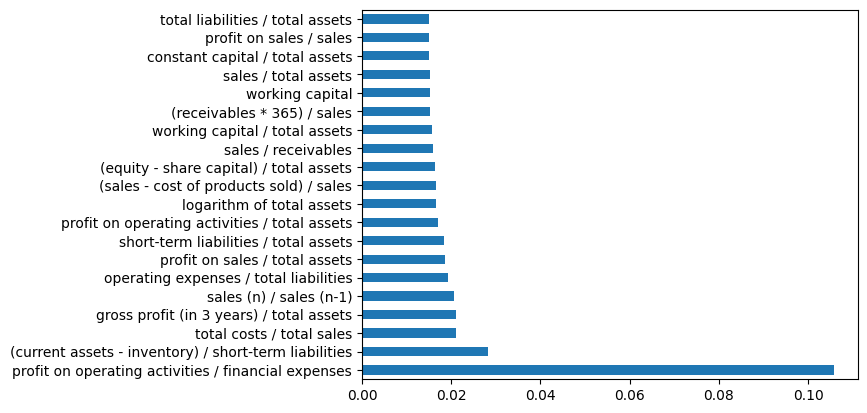

In [36]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [37]:
X.head()

net profit / total assets  total liabilities / total assets  \
0                   0.200550                           0.37951   
1                   0.209120                           0.49988   
2                   0.248660                           0.69592   
3                   0.081483                           0.30734   
4                   0.187320                           0.61323   

   working capital / total assets  current assets / short-term liabilities  \
0                         0.39641                                   2.0472   
1                         0.47225                                   1.9447   
2                         0.26713                                   1.5548   
3                         0.45879                                   2.4928   
4                         0.22960                                   1.4063   

   (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                            32.3510                                                                   
1                                            14.7860                                                                   
2                                            -1.1523                                                                   
3                                            51.9520                                                                   
4                                            -7.3128                                                                   

   retained earnings / total assets  EBIT / total assets  \
0                           0.38825             0.249760   
1                           0.00000             0.258340   
2                           0.00000             0.309060   
3                           0.14988             0.092704   
4                           0.18732             0.187320   

   book value of equity / total liabilities  sales / total assets  \
0                                   1.33050                1.1389   
1                                   0.99601                1.6996   
2                                   0.43695                1.3090   
3                                   1.86610                1.0571   
4                                   0.63070                1.1559   

   equity / total assets  ...  working capital  \
0                0.50494  ...         348690.0   
1                0.49788  ...           2304.6   
2                0.30408  ...           6332.7   
3                0.57353  ...          20545.0   
4                0.38677  ...           3186.6   

   (sales - cost of products sold) / sales  \
0                                 0.121960   
1                                 0.121300   
2                                 0.241140   
3                                 0.054015   
4                                 0.134850   

   (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  \
0                                            0.39718                                               
1                                            0.42002                                               
2                                            0.81774                                               
3                                            0.14207                                               
4                                            0.48431                                               

   total costs / total sales  long-term liabilities / equity  \
0                    0.87804                        0.001924   
1                    0.85300                        0.000000   
2                    0.76599                        0.694840   
3                    0.94598                        0.000000   
4                    0.86515                        0.124440   

   sales / inventory  sales / receivables  \
0             8.4160           

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((30383, 64), (13022, 64))

In [39]:
X_train.corr()

net profit / total assets  \
net profit / total assets                                            1.000000   
total liabilities / total assets                                    -0.115885   
working capital / total assets                                       0.046876   
current assets / short-term liabilities                              0.000624   
(cash + short-term securities + receivables - s...                   0.000370   
...                                                                       ...   
sales / inventory                                                    0.000270   
sales / receivables                                                  0.000090   
(short-term liabilities * 365) / sales                               0.001066   
sales / short-term liabilities                                       0.002262   
sales / fixed assets                                                -0.059740   

                                                    total liabilities / total assets  \
net profit / total assets                                                  -0.115885   
total liabilities / total assets                                            1.000000   
working capital / total assets                                             -0.866158   
current assets / short-term liabilities                                    -0.002491   
(cash + short-term securities + receivables - s...                         -0.022448   
...                                                                              ...   
sales / inventory                                                          -0.000030   
sales / receivables                                                        -0.001673   
(short-term liabilities * 365) / sales                                      0.048081   
sales / short-term liabilities                                             -0.003187   
sales / fixed assets                                                       -0.007771   

                                                    working capital / total assets  \
net profit / total assets                                                 0.046876   
total liabilities / total assets                                         -0.866158   
working capital / total assets                                            1.000000   
current assets / short-term liabilities                                   0.003895   
(cash + short-term securities + receivables - s...                        0.025587   
...                                                                            ...   
sales / inventory                                                         0.000045   
sales / receivables                                                       0.000025   
(short-term liabilities * 365) / sales                                   -0.055188   
sales / short-term liabilities                                            0.004112   
sales / fixed assets                                                     -0.000209   

                                                    current assets / short-term liabilities  \
net profit / total assets                                                          0.000624   
total liabilities / total assets                                                  -0.002491   
working capital / total assets                                                     0.003895   
current assets / short-term liabilities                                            1.000000   
(cash + short-term securities + receivables - s...                                 0.002001   
...                                                                                     ...   
sales / inventory                                                                  0.000222   
sales / receivables                                                                0.009194   
(short-term liabilities * 365) / sales                                            -0.000046   
sales / short-term liabilities         

In [40]:
plt.figure(figsize=(100,100))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [41]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

30

In [43]:
corr_features

{'(current assets - inventory) / short-term liabilities',
 '(equity - share capital) / total assets',
 '(gross profit + depreciation) / total liabilities',
 '(gross profit + extraordinary items + financial expenses) / total assets',
 '(gross profit + interest) / sales',
 '(gross profit + interest) / total assets',
 '(inventory * 365) / cost of products sold',
 '(net profit + depreciation) / total liabilities',
 '(receivables * 365) / sales',
 '(short-term liabilities * 365) / sales',
 'EBITDA (profit on operating activities - depreciation) / sales',
 'EBITDA (profit on operating activities - depreciation) / total assets',
 'constant capital / fixed assets',
 'constant capital / total assets',
 'current assets / total liabilities',
 'gross profit (in 3 years) / total assets',
 'gross profit / total assets',
 'net profit / sales',
 'operating expenses / total liabilities',
 'profit on operating activities / total assets',
 'profit on sales / total assets',
 'retained earnings / total ass

In [44]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

net profit / total assets  total liabilities / total assets  \
41755                   0.143880                          0.365840   
29877                   0.033744                          0.580670   
15386                   0.185160                          0.097592   
829                     0.371760                          0.145240   
16030                   0.115100                          0.471910   
...                          ...                               ...   
37585                   0.229930                          0.123290   
14632                   0.035505                          0.489880   
4303                    0.075607                          0.865590   
23379                   0.034074                          0.231610   
21675                   0.021526                          0.462820   

       current assets / short-term liabilities  \
41755                                  2.05000   
29877                                  1.62520   
15386                                  8.10490   
829                                    6.17060   
16030                                  2.23510   
...                                        ...   
37585                                  6.70610   
14632                                  0.45189   
4303                                   1.00630   
23379                                  4.10670   
21675                                  1.97040   

       (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
41755                                           20.01400                                                                   
29877                                           -1.21510                                                                   
15386                                          280.28000                                                                   
829                                             96.45900                                                                   
16030                                           28.47600                                                                   
...                                                  ...                                                                   
37585                                          123.23000                                                                   
14632                                         3182.60000                                                                   
4303                                           -30.46300                                                                   
23379                                           37.73900                                                                   
21675                                            0.99314                                                                   

       EBIT / total assets  book value of equity / total liabilities  \
41755             0.132530                                   1.68880   
29877             0.041220                                   0.72216   
15386             0.185160                                   9.24680   
829               0.463400                                   5.88490   
16030             0.159760                                   1.11910   
...                    ...                                       ...   
37585             0.284550                                   7.11080   
14632             0.046165                                   1.04130   
4303              0.094603                                   0.15528   
23379             0.050472                                   3.31760   
21675             0.026419                                   1.16070   

       sales / total assets  equity / total assets  \
41755               1.20760                0.61781   
29877               2.19370                0.41933   
15386               1.59010                0.9024

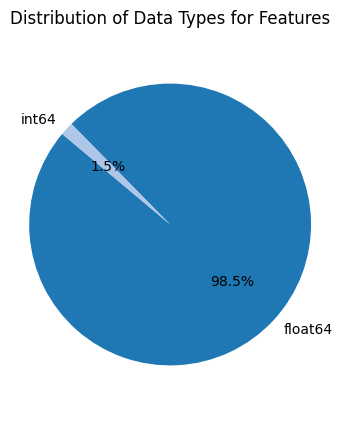

In [45]:
data_type_counts = all_data_reset.dtypes.value_counts()

# Create a pie chart
plt.figure(figsize=(4, 5))
plt.pie(data_type_counts, labels=data_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Data Types for Features")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###Information Gain


In [46]:
from sklearn.feature_selection import mutual_info_classif

In [47]:
mutual_info=mutual_info_classif(X,y)

In [48]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

profit on operating activities / financial expenses       0.028308
gross profit (in 3 years) / total assets                  0.015324
profit on operating activities / sales                    0.014797
(net profit + depreciation) / total liabilities           0.014438
profit on operating activities / total assets             0.014105
                                                            ...   
(inventory * 365) / sales                                 0.001183
sales / receivables                                       0.001127
(receivables * 365) / sales                               0.001115
(current assets - inventories) / long-term liabilities    0.000000
total sales / total assets                                0.000000
Length: 64, dtype: float64

In [49]:

def correlatio2(dataset,min_threseloed, max_thresloed):
                     corr_matrix = dataset.corr()
                     mask = (corr_matrix < max_thresloed) & (corr_matrix >min_threseloed)
                     high_corr_values = corr_matrix[mask]
                     printed_pairs = set()

                     for col1, col2 in high_corr_values.stack().index:
                          correlation = high_corr_values.loc[col1, col2]
                          # Check if the reverse pair has already been printed
                          if (col2, col1) not in printed_pairs:
                              printed_pairs.add((col1, col2))
                              print(f"Columns: {col1} and {col2}, Correlation: {correlation:.4f}")

In [50]:
correlatio2(all_data_reset,0.85,1)

Columns: total liabilities / total assets and short-term liabilities / total assets, Correlation: 0.9268
Columns: current assets / short-term liabilities and (current assets - inventory) / short-term liabilities, Correlation: 0.9999
Columns: current assets / short-term liabilities and current assets / total liabilities, Correlation: 0.9548
Columns: EBIT / total assets and (gross profit + extraordinary items + financial expenses) / total assets, Correlation: 0.9037
Columns: EBIT / total assets and (gross profit + interest) / total assets, Correlation: 1.0000
Columns: EBIT / total assets and gross profit / total assets, Correlation: 0.9957
Columns: EBIT / total assets and profit on operating activities / total assets, Correlation: 0.8886
Columns: EBIT / total assets and EBITDA (profit on operating activities - depreciation) / total assets, Correlation: 0.8647
Columns: book value of equity / total liabilities and total assets / total liabilities, Correlation: 0.9996
Columns: sales / total

In [51]:
correlatio2(all_data_reset,-1,-0.9)

Columns: total liabilities / total assets and working capital / total assets, Correlation: -0.9270
Columns: working capital / total assets and short-term liabilities / total assets, Correlation: -0.9982
Columns: (inventory * 365) / sales and EBITDA (profit on operating activities - depreciation) / sales, Correlation: -0.9594
Columns: (inventory * 365) / sales and (sales - cost of products sold) / sales, Correlation: -0.9999
Columns: (total liabilities - cash) / sales and EBITDA (profit on operating activities - depreciation) / sales, Correlation: -0.9481
Columns: (total liabilities - cash) / sales and (sales - cost of products sold) / sales, Correlation: -0.9032
Columns: rotation receivables + inventory turnover in days and EBITDA (profit on operating activities - depreciation) / sales, Correlation: -0.9736
Columns: rotation receivables + inventory turnover in days and (sales - cost of products sold) / sales, Correlation: -0.9926
Columns: (receivables * 365) / sales and EBITDA (profit 

In [52]:
plt.figure(figsize=(100,100))
sns.heatmap(all_data_reset.corr(),cmap=plt.cm.Reds,annot=True)


<Axes: >